## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
data = pd.read_csv('../input/heart-disease-uci/heart.csv')
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## Exploratory Data Analysis

* age [29-77]
* sex [1=male, 0=female]
* chest pain type (4 values) [0, 1, 2, 3]
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl [1=true, 0=false]
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved => thalach
* exercise induced angina [1=yes, 0=no]
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment [0, 1, 2]
* number of major vessels (0-3) colored by flourosopy [0, 1, 2, 3, 4]
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target [1=Have Heart Disease, 0=Don't have Heart Disease]

In [3]:
print("Total Rows in a Data: ", data.shape[0])
print("Total Columns in a Data: ", data.shape[1])

Total Rows in a Data:  303
Total Columns in a Data:  14


In [4]:
print("\t****************")
print("\tData Information:")
print("\t****************\n")
data.info()

	****************
	Data Information:
	****************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


All the values in a dataset are numerical.

In [5]:
print("\t****************")
print("\tData Describe:")
print("\t****************\n")
data.describe()

	****************
	Data Describe:
	****************



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
print("Null Values in each column:")
print(data.isna().any())

Null Values in each column:
age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool


Has from the above output there's no missing values in any column so we don't have to do data cleaning and data filling.

In [7]:
print("Unique Values in each column:")
print("----------------------------\n")
cols = list(data.columns)
for c in cols:
    print(c.upper(), ":", data[c].unique(), "\n")

Unique Values in each column:
----------------------------

AGE : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77] 

SEX : [1 0] 

CP : [3 2 1 0] 

TRESTBPS : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] 

CHOL : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293

### Exploring Age Column

In [8]:
print("The most younger person in a data:")
print(data.iloc[data.age.idxmin()])

The most younger person in a data:
age          29.0
sex           1.0
cp            1.0
trestbps    130.0
chol        204.0
fbs           0.0
restecg       0.0
thalach     202.0
exang         0.0
oldpeak       0.0
slope         2.0
ca            0.0
thal          2.0
target        1.0
Name: 72, dtype: float64


the most youngest person is a male and has a heart disease.

In [9]:
print("The most older person in a data:")
print(data.iloc[data.age.idxmax()])

The most older person in a data:
age          77.0
sex           1.0
cp            0.0
trestbps    125.0
chol        304.0
fbs           0.0
restecg       0.0
thalach     162.0
exang         1.0
oldpeak       0.0
slope         2.0
ca            3.0
thal          2.0
target        0.0
Name: 238, dtype: float64


the most older person is a male and not has a heart disease.

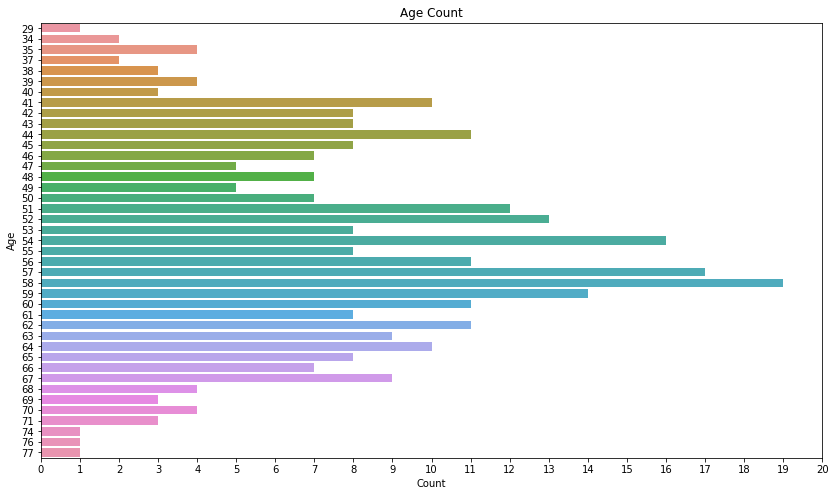

In [10]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(y=data.age)
# sns.countplot(y=data['age'], order=data['age'].value_counts().index)
plt.title("Age Count")
plt.xlabel("Count")
plt.ylabel("Age")
ax.set(xticks=range(0, 21))
plt.show()

As we can see from the above plot, mostly people age are between 50-60

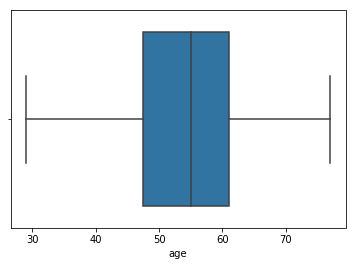

In [11]:
sns.boxplot(data.age)
plt.show()

There is no outlier in a dataset as we can see from the above plot. The average person age is between 50-60.

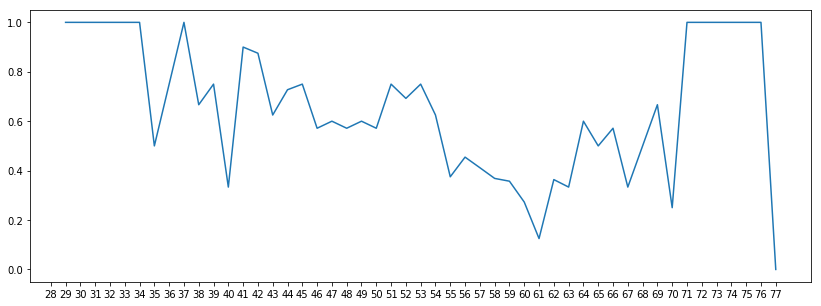

In [12]:
fig, ax = plt.subplots(figsize=(14, 5))
ax = plt.plot(data.groupby('age')['target'].mean())
plt.xticks(range(min(data.age)-1, max(data.age)+1))
plt.show()

People from the age between 29 to 32 and 70 to 76 has the highest chance of having a heart disease.

In [13]:
data[data.age == 61]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3,0
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3,0
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0


In [14]:
data[data.age > 70]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0


As from the above chart people above 70 has highest chance of having a heart disease.

### Exploring Gender Column

In [15]:
print("Number of Unique Values in Gender Column: ", data.sex.nunique(), "\n")
print("Unique Values count are:")
print(data.sex.value_counts())

Number of Unique Values in Gender Column:  2 

Unique Values count are:
1    207
0     96
Name: sex, dtype: int64


In this dataset mostly people are Males and some are Females

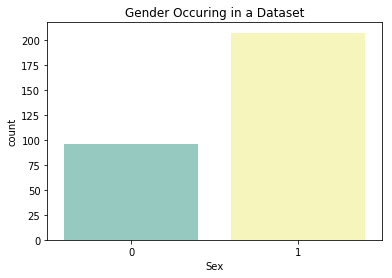

In [16]:
ax = sns.countplot(data.sex, palette='Set3')
plt.xlabel("Sex")
plt.title("Gender Occuring in a Dataset")
plt.show()

As we can see from the above plot Males are the most in a data

In [17]:
data.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

Male has a high heart disease rate than female and they are occuring 93 times while female has 72 times occuring

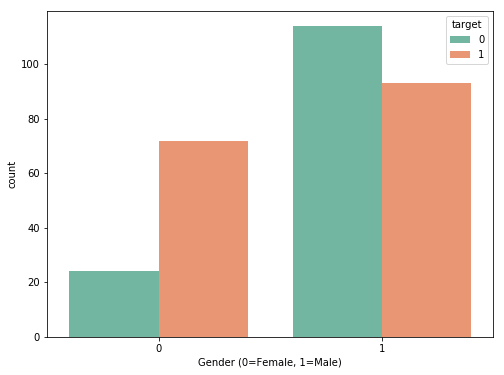

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x='sex', hue='target', data=data, palette='Set2')
plt.xlabel("Gender (0=Female, 1=Male)")
plt.show()

As we can see from the above plot, that Male has a higher rate of heart disease.

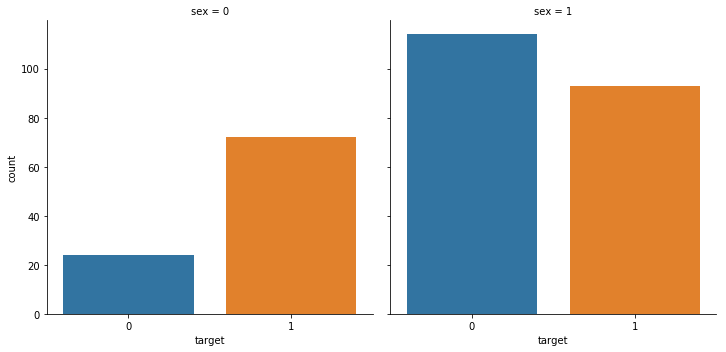

In [19]:
ax = sns.catplot(x='target', col='sex', data=data, kind='count')

### Exploring Chest Pain Column

In [20]:
print("Number of Unique Values in Chest Pain Type Column: ", data.cp.nunique(), "\n")
print("Unique Values count are:")
print(data.cp.value_counts())

Number of Unique Values in Chest Pain Type Column:  4 

Unique Values count are:
0    143
2     87
1     50
3     23
Name: cp, dtype: int64


Here 0 means no pain and 3 means extreme pain

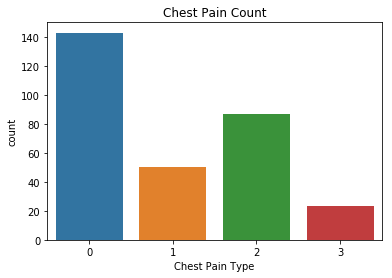

In [21]:
sns.countplot(data.cp)
plt.title("Chest Pain Count")
plt.xlabel("Chest Pain Type")
plt.show()

Mostly people have no Chest Pain

In [22]:
data.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: target, dtype: int64

Person who has a Chest Pain Type 1 and 2 has the highest chance to have Heart Disease.

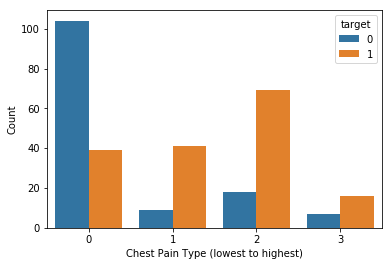

In [23]:
ax = sns.countplot(x='cp', data=data, hue='target')
plt.xlabel("Chest Pain Type (lowest to highest)")
plt.ylabel("Count")
plt.show()

In this plot, as we can see a Person who has a chest pain type 2 has mostly chances to have heart disease.

### Exploring Blood Sugar Column

In [24]:
print("Number of Unique Values in Fasting Blood Sugar Column: ", data.fbs.nunique(), "\n")
print("Unique Values count are:")
print(data.fbs.value_counts())

Number of Unique Values in Fasting Blood Sugar Column:  2 

Unique Values count are:
0    258
1     45
Name: fbs, dtype: int64


In [25]:
data.groupby('fbs')['target'].value_counts()

fbs  target
0    1         142
     0         116
1    1          23
     0          22
Name: target, dtype: int64

A person who don't have a Blood Sugar has the highest chance of having Heart Disease.

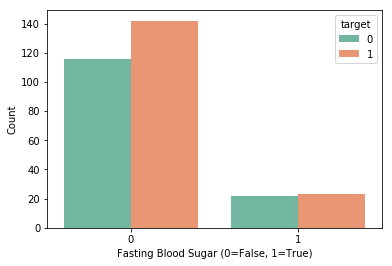

In [26]:
sns.countplot(x='fbs', hue='target', data=data, palette='Set2')
plt.xlabel("Fasting Blood Sugar (0=False, 1=True)")
plt.ylabel("Count")
plt.show()

### Exploring Electrographic Column

In [27]:
print("Number of Unique Values in Resting Electrocardiographic Column: ", data.restecg.nunique(), "\n")
print("Unique Values count are:")
print(data.restecg.value_counts())

Number of Unique Values in Resting Electrocardiographic Column:  3 

Unique Values count are:
1    152
0    147
2      4
Name: restecg, dtype: int64


In [28]:
data.groupby('restecg')['target'].value_counts()

restecg  target
0        0         79
         1         68
1        1         96
         0         56
2        0          3
         1          1
Name: target, dtype: int64

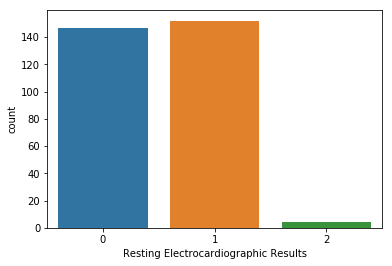

In [29]:
sns.countplot(x=data['restecg'])
plt.xlabel("Resting Electrocardiographic Results")
plt.show()

### Exploring Thalach Column

Thalach = maximum heart rate achieved

In [30]:
print("Number of Unique Values in Thalach Column: ", data.thalach.nunique(), "\n")
print("Unique Values count are:")
print(data.thalach.value_counts())

Number of Unique Values in Thalach Column:  91 

Unique Values count are:
162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64


Thalach is a continous column so we have to draw distribute plot

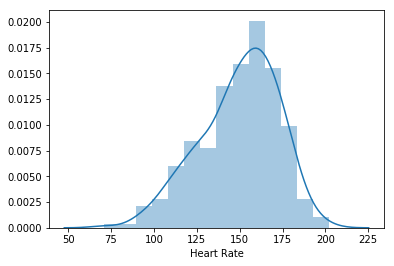

In [31]:
sns.distplot(data.thalach)
plt.xlabel("Heart Rate")
plt.show()

It is left skewed means negative skewed. [For Further Know](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/)

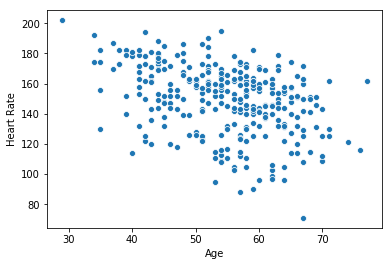

In [32]:
sns.scatterplot(x='age', y='thalach', data=data)
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.show()

### Exploring Exercise Induced Angina Column

[Open this link for further knowing of Exercise Induced Angina](https://www.mayoclinic.org/diseases-conditions/angina/symptoms-causes/syc-20369373)

In [33]:
print("Number of Unique Values in Exercise Induced Angina Column: ", data.exang.nunique(), "\n")
print("Unique Values count are:")
print(data.exang.value_counts())

Number of Unique Values in Exercise Induced Angina Column:  2 

Unique Values count are:
0    204
1     99
Name: exang, dtype: int64


This result shows us that 204 people have no Exercise Induced Angina and 99 people have it.

In [34]:
data.groupby('exang')['target'].value_counts()

exang  target
0      1         142
       0          62
1      0          76
       1          23
Name: target, dtype: int64

As we can see from the above output people who don't have Induced Angina have a higher chance of having Heart Disease.

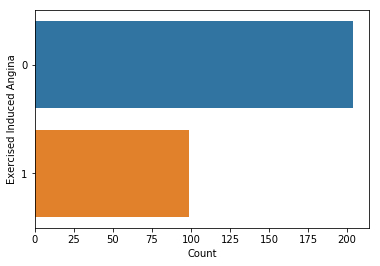

In [35]:
sns.countplot(y=data.exang)
plt.xlabel("Count")
plt.ylabel("Exercised Induced Angina")
plt.show()

Now let visualize the above graph with respect to Target variable

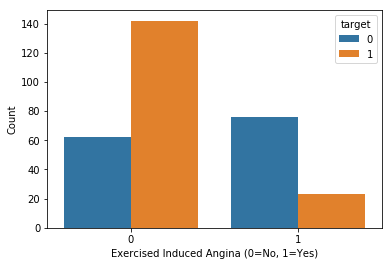

In [36]:
ax = sns.countplot(x='exang', data=data, hue='target')
plt.xlabel("Exercised Induced Angina (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

Above graph is illustrating that person who don't have Induced Angina has Heart Disease.

### Exploring Slope Column

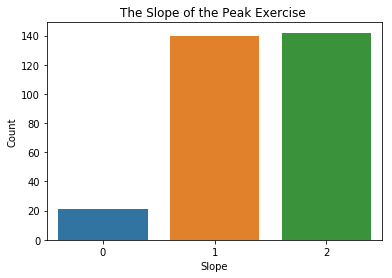

In [37]:
plt.title("The Slope of the Peak Exercise ")
sns.countplot(x=data['slope'])
plt.xlabel("Slope")
plt.ylabel("Count")
plt.show()

As we can see 1 and 2 are the highest occuring slopes in a dataset

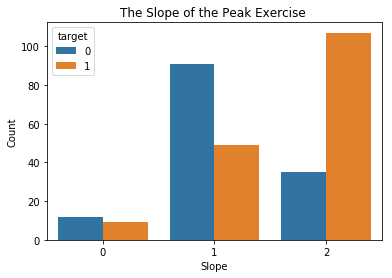

In [38]:
plt.title("The Slope of the Peak Exercise ")
sns.countplot(x=data['slope'], hue=data['target'], data=data)
plt.xlabel("Slope")
plt.ylabel("Count")
plt.show()

The person who has a type 2 slope has a higher chance of having Heart Disease

### Exploring Further Columns

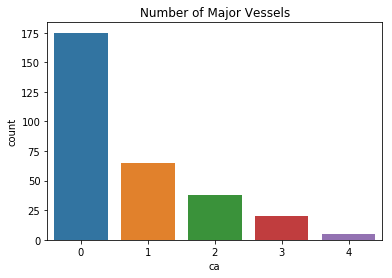

In [39]:
sns.countplot(x=data['ca'])
plt.title("Number of Major Vessels")
plt.show()

In ca column there are 5 categories.

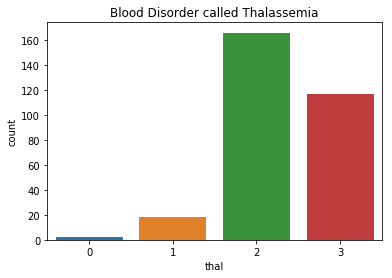

In [40]:
sns.countplot(x=data['thal'])
plt.title("Blood Disorder called Thalassemia")
plt.show()

### Exploring Target Column

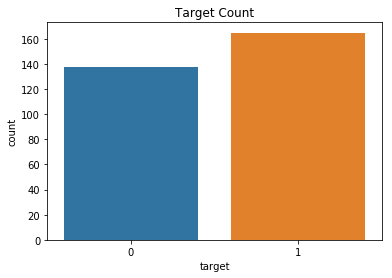

In [41]:
sns.countplot(x=data['target'])
plt.title("Target Count")
plt.show()

There are more people who have a heart disease in this data.

## Data Correlation

In [42]:
data.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

Column: cp, thalach, slope are +ve correlated to a target while other columns are -ve correlated.

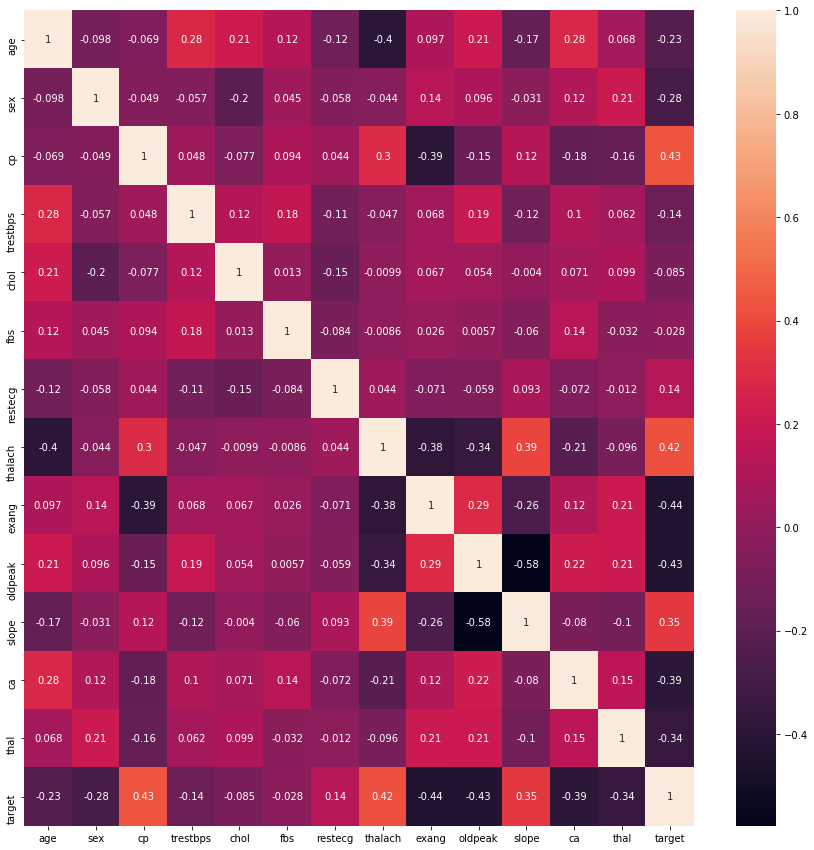

In [43]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True)
plt.show()

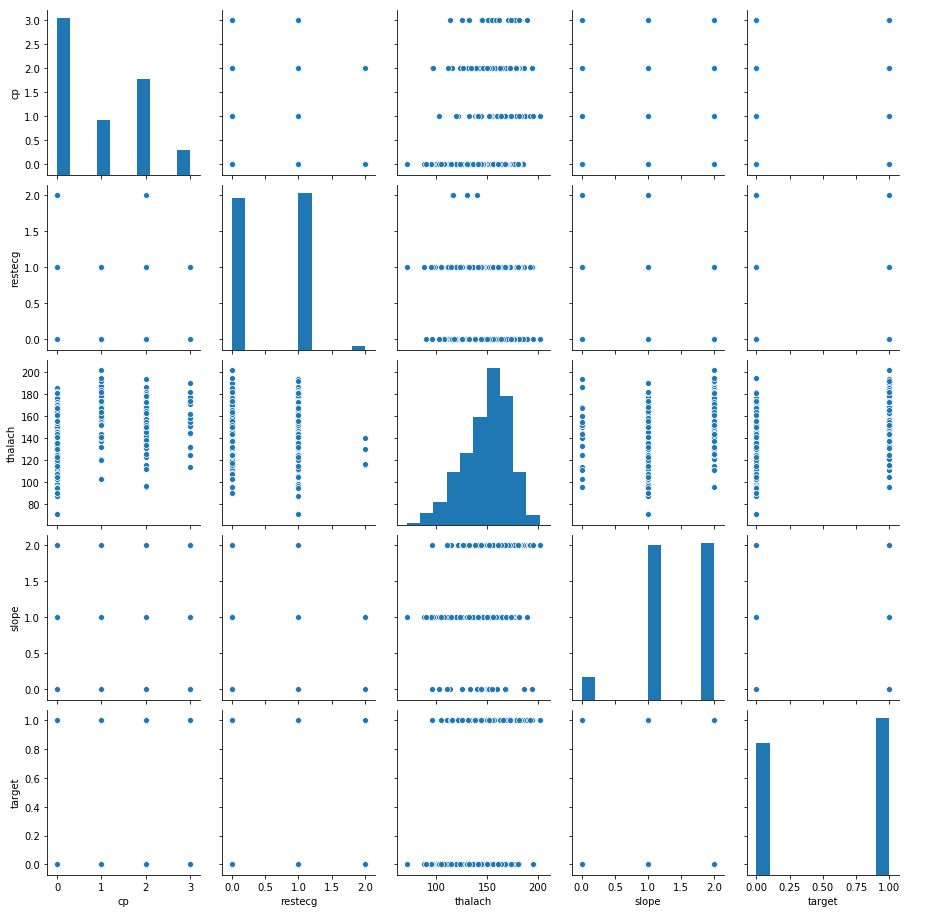

In [44]:
sns.pairplot(data[['cp', 'restecg', 'thalach', 'slope', 'target']])
plt.show()

## Prediction

In [45]:
X1 = data.iloc[:, :-1]
y1 = data.iloc[:, -1]

df = data[['cp', 'restecg', 'thalach', 'slope', 'target']]
X2 = df.iloc[:, :-1]
y2 = df.iloc[:, -1]

print("Columns in Data1: ", list(data.columns))
print("Data1 Shape: ", data.shape)
print("X1 Shape: ", X1.shape)
print("y1 Shape: ", y1.shape)
print()

print("Columns in Data2: ", list(df.columns))
print("Data2 Shape: ", df.shape)
print("X2 Shape: ", X2.shape)
print("y2 Shape: ", y2.shape)

Columns in Data1:  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Data1 Shape:  (303, 14)
X1 Shape:  (303, 13)
y1 Shape:  (303,)

Columns in Data2:  ['cp', 'restecg', 'thalach', 'slope', 'target']
Data2 Shape:  (303, 5)
X2 Shape:  (303, 4)
y2 Shape:  (303,)


### Splitting Data

### Train Test Split

In [46]:
from sklearn.model_selection import train_test_split
train_X1, test_X1, train_y1, test_y1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
train_X2, test_X2, train_y2, test_y2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

For prediction, i'm going to use 
* Decision Tree Classifier
* Random Forest Classifier 
* Logistic Regression
* Support Vector Machine 
* Stochastic Gradient Descent
* K-Nearest Neighbor Classifier
* Adaboost Classifier

### Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(train_X1, train_y1)
pred_dtc1 = DTC.predict(test_X1)
score_dtc1 = round(DTC.score(test_X1, test_y1)*100, 2)
print("Accuracy of Data 1 with Decision Tree Classifier is: ", score_dtc1, "%")
print()
DTC.fit(train_X2, train_y2)
pred_dtc2 = DTC.predict(test_X2)
score_dtc2 = round(DTC.score(test_X2, test_y2)*100, 2)
print("Accuracy of Data 2 with Decision Tree Classifier is: ", score_dtc2, "%")

Accuracy of Data 1 with Decision Tree Classifier is:  83.61 %

Accuracy of Data 2 with Decision Tree Classifier is:  67.21 %


### Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier() # n_estimators = 100
RFC.fit(train_X1, train_y1)
pred_rfc1 = RFC.predict(test_X1)
score_rfc1 = round(RFC.score(test_X1, test_y1)*100, 2)
print("Accuracy of Data 1 with Random Forest Classifier is: ", score_rfc1, "%")
print()
RFC.fit(train_X2, train_y2)
pred_rfc2 = RFC.predict(test_X2)
score_rfc2 = round(RFC.score(test_X2, test_y2)*100, 2)
print("Accuracy of Data 2 with Random Forest Classifier is: ", score_rfc2, "%")

Accuracy of Data 1 with Random Forest Classifier is:  83.61 %

Accuracy of Data 2 with Random Forest Classifier is:  73.77 %


### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(train_X1, train_y1)
pred_lr1 = LR.predict(test_X1)
score_lr1 = round(LR.score(test_X1, test_y1)*100, 2)
print("Accuracy of Data 1 with Logistic Regression is: ", score_lr1, "%")
print()
LR.fit(train_X2, train_y2)
pred_lr2 = LR.predict(test_X2)
score_lr2 = round(LR.score(test_X2, test_y2)*100, 2)
print("Accuracy of Data 2 with Logistic Regression is: ", score_lr2, "%")

Accuracy of Data 1 with Logistic Regression is:  88.52 %

Accuracy of Data 2 with Logistic Regression is:  80.33 %


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Support Vector Machine

In [50]:
from sklearn.svm import SVC
SC = SVC()
SC.fit(train_X1, train_y1)
pred_sc1 = SC.predict(test_X1)
score_sc1 = round(SC.score(test_X1, test_y1)*100, 2)
print("Accuracy of Data 1 with Support Vector Classifier is: ", score_sc1, "%")
print()
SC.fit(train_X2, train_y2)
pred_sc2 = SC.predict(test_X2)
score_sc2 = round(SC.score(test_X2, test_y2)*100, 2)
print("Accuracy of Data 2 with Support Vector Classifier is: ", score_sc2, "%")

Accuracy of Data 1 with Support Vector Classifier is:  70.49 %

Accuracy of Data 2 with Support Vector Classifier is:  68.85 %


### Stochastic Gradient Descent

In [51]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier()
SGD.fit(train_X1, train_y1)
pred_sgd1 = SGD.predict(test_X1)
score_sgd1 = round(SGD.score(test_X1, test_y1)*100, 2)
print("Accuracy of Data 1 with Stochastic Gradient Descent Classifier is: ", score_sgd1, "%")
print()
SGD.fit(train_X2, train_y2)
pred_sgd2 = SGD.predict(test_X2)
score_sgd2 = round(SGD.score(test_X2, test_y2)*100, 2)
print("Accuracy of Data 2 with Stochastic Gradient Descent Classifier is: ", score_sgd2, "%")

Accuracy of Data 1 with Stochastic Gradient Descent Classifier is:  54.1 %

Accuracy of Data 2 with Stochastic Gradient Descent Classifier is:  67.21 %


### K-Nearest Neighbor Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=10) # default n_neighbors = 5
KNN.fit(train_X1, train_y1)
pred_knn1 = KNN.predict(test_X1)
score_knn1 = round(KNN.score(test_X1, test_y1)*100, 2)
print("Accuracy of Data 1 with K-Nearest Neighbor Classifier is: ", score_knn1, "%")
print()
KNN.fit(train_X2, train_y2)
pred_knn2 = KNN.predict(test_X2)
score_knn2 = round(KNN.score(test_X2, test_y2)*100, 2)
print("Accuracy of Data 2 with K-Nearest Neighbor Classifier is: ", score_knn2, "%")

Accuracy of Data 1 with K-Nearest Neighbor Classifier is:  70.49 %

Accuracy of Data 2 with K-Nearest Neighbor Classifier is:  77.05 %


### AdaBoost Classifier

In [53]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier() # n_estimators = 50 default
ABC.fit(train_X1, train_y1)
pred_abc1 = ABC.predict(test_X1)
score_abc1 = round(ABC.score(test_X1, test_y1)*100, 2)
print("Accuracy of Data 1 with AdaBoost Classifier is: ", score_abc1, "%")
print()
ABC.fit(train_X2, train_y2)
pred_abc2 = ABC.predict(test_X2)
score_abc2 = round(ABC.score(test_X2, test_y2)*100, 2)
print("Accuracy of Data 2 with AdaBoost Classifier is: ", score_abc2, "%")

Accuracy of Data 1 with AdaBoost Classifier is:  80.33 %

Accuracy of Data 2 with AdaBoost Classifier is:  78.69 %


## RESULT:

In [54]:
model1 = pd.DataFrame(
    {
        'Models': [
            'Decision Tree Classifier',
            'Random Forest Classifier',
            'Logistic Regression',
            'Support Vector Machine',
            'Stochastic Gradient Descent',
            'K-Nearest Neighbors',
            'AdaBoost Classifier'
        ],
        'Scores': [
            score_dtc1,
            score_rfc1,
            score_lr1,
            score_sc1,
            score_sgd1,
            score_knn1,
            score_abc1
        ],
    }
)
model2 = pd.DataFrame(
    {
        'Models': [
            'Decision Tree Classifier',
            'Random Forest Classifier',
            'Logistic Regression',
            'Support Vector Machine',
            'Stochastic Gradient Descent',
            'K-Nearest Neighbors',
            'AdaBoost Classifier'
        ],
        'Scores': [
            score_dtc2,
            score_rfc2,
            score_lr2,
            score_sc2,
            score_sgd2,
            score_knn2,
            score_abc2
        ],
    }
)

In [55]:
print("Models who are Train on Data 1:")
model1

Models who are Train on Data 1:


,Models,Scores
0,Decision Tree Classifier,83.61
1,Random Forest Classifier,83.61
2,Logistic Regression,88.52
3,Support Vector Machine,70.49
4,Stochastic Gradient Descent,54.10
5,K-Nearest Neighbors,70.49
6,AdaBoost Classifier,80.33


In this result, Decision Tree, Random Forest, Logistic Regression, AdaBoost are the best choice for Data 1

In [56]:
print("Models who are Train on Data 2:")
model2

Models who are Train on Data 2:


,Models,Scores
0,Decision Tree Classifier,67.21
1,Random Forest Classifier,73.77
2,Logistic Regression,80.33
3,Support Vector Machine,68.85
4,Stochastic Gradient Descent,67.21
5,K-Nearest Neighbors,77.05
6,AdaBoost Classifier,78.69


In this result, Stochastic Gradient Descent, Logistic Regression are the best choice for Data 2